In [1]:
# Import libraries
import numpy as np
import os
import cv2
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.optim as optim
import tqdm

In [2]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device='cpu'
print(device)

cuda


In [3]:
main_folder = "./iith-dl-contest-2024/train/train"

In [4]:
# Define a transform to read the data in as a tensor
transform = transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Load the training data
train_data = datasets.ImageFolder(main_folder, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
print("Data loaded")
print("Number of training samples: ", len(train_data))
# print shape of training data
print("Shape of training data: ", train_data[0][0].shape)
print(train_data.classes)
print("Number of classes: ", len(train_data.classes))

Data loaded
Number of training samples:  65000
Shape of training data:  torch.Size([3, 64, 64])
['n01443537', 'n01774750', 'n01784675', 'n01882714', 'n01910747', 'n01944390', 'n01983481', 'n02056570', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02190166', 'n02206856', 'n02226429', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02364673', 'n02395406', 'n02410509', 'n02423022', 'n02480495', 'n02481823', 'n02486410', 'n02769748', 'n02793495', 'n02802426', 'n02808440', 'n02814860', 'n02843684', 'n02906734', 'n02948072', 'n02950826', 'n03424325', 'n03649909', 'n04133789', 'n04146614', 'n04275548', 'n04465501', 'n07695742', 'n07720875', 'n07734744', 'n07753592', 'n07768694', 'n07873807', 'n07920052', 'n12267677']
Number of classes:  50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


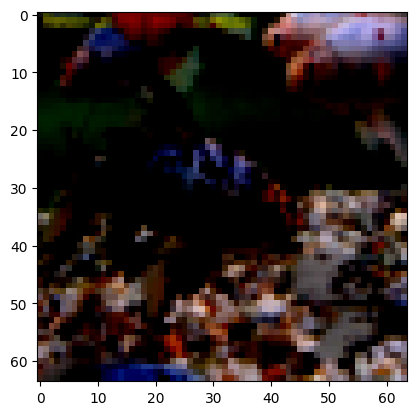

In [5]:
# print a sample image
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [6]:
# Do using ResNet18
import torchvision.models as models

# Define ConvNeXt base model
model = models.convnext_base(num_classes=50, weights=None).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
for epoch in range(n_epochs):
    train_loss = 0.0
    correct = 0
    total = 0
    for data, target in tqdm.tqdm(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    train_loss = train_loss / len(train_loader.dataset)
    acc = 100 * correct / total
    print('Epoch: {} \tTraining Loss: {:.6f} \tAccuracy: {:.2f}'.format(epoch + 1, train_loss, acc))
    # if acc>72 break
    # if acc > 72:
    #     break

100%|██████████| 2032/2032 [09:12<00:00,  3.68it/s]


Epoch: 1 	Training Loss: 3.348835 	Accuracy: 14.99


100%|██████████| 2032/2032 [09:10<00:00,  3.69it/s]


Epoch: 2 	Training Loss: 2.928754 	Accuracy: 23.06


100%|██████████| 2032/2032 [09:08<00:00,  3.71it/s]


Epoch: 3 	Training Loss: 2.688965 	Accuracy: 28.36


100%|██████████| 2032/2032 [09:08<00:00,  3.70it/s]


Epoch: 4 	Training Loss: 2.455876 	Accuracy: 33.78


100%|██████████| 2032/2032 [09:10<00:00,  3.69it/s]


Epoch: 5 	Training Loss: 2.256590 	Accuracy: 38.35


100%|██████████| 2032/2032 [09:06<00:00,  3.72it/s]


Epoch: 6 	Training Loss: 2.048091 	Accuracy: 43.19


100%|██████████| 2032/2032 [09:05<00:00,  3.73it/s]


Epoch: 7 	Training Loss: 1.809270 	Accuracy: 48.94


100%|██████████| 2032/2032 [09:04<00:00,  3.73it/s]


Epoch: 8 	Training Loss: 1.514981 	Accuracy: 56.13


100%|██████████| 2032/2032 [09:13<00:00,  3.67it/s]


Epoch: 9 	Training Loss: 1.150622 	Accuracy: 65.53


100%|██████████| 2032/2032 [09:13<00:00,  3.67it/s]

Epoch: 10 	Training Loss: 0.787614 	Accuracy: 75.45


In [7]:
# predict a sample image
model.eval()
data, target = train_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
_, pred = torch.max(output, 1)
print("Predicted label: ", train_data.classes[pred.item()])
print("True label: ", train_data.classes[target])

Predicted label:  n01443537
True label:  n01443537


In [8]:
test_dir="./iith-dl-contest-2024/test"

In [9]:
test_data = datasets.ImageFolder(test_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

model.eval()
preds = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        output = model(data)
        _, pred = torch.max(output, 1)
        preds += pred.cpu().numpy().tolist()
        
        
# print(preds)

In [10]:
# get class names
class_names = train_data.classes

# generate file names are 1.JPEG, 2.JPEG, etc using for loop
file_names = [str(i)+".JPEG" for i in range(len(preds))]

# sort the file names
file_names.sort()
# print(file_names)


In [11]:
# print into submission file
with open("./submission_convnextbasic_apr20.csv", "w") as f:
    f.write("ID,Category\n")
    for i in range(len(preds)):
        f.write(file_names[i]+","+class_names[preds[i]]+"\n")

In [16]:
torch.save(model.state_dict(),"/kaggle/working/17thapr_sort.pth")


In [ ]:
# name submission CSV=submission_convnextbasic_acc_53.csv
# used convnext_basic, accuracy=0.52746